## Multiple Linear Regression

### BoomBikes Prediction of Demand

###### The steps we will foww in this excersise are as follows :

    1.Understanding the data
    2.Data Prepration
    3.Training the data
    4.Residual Analysis
    5.Predictions on Test setup

### Step 1 : Reading and Understanding the Data
       Import the libraries
       Import the data and views it column
       Check all the statistics and types of the data
       Visualise numerical and categorical data

In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [2]:
#import the data into the python notebook

filepath = 'C:/Users/SRSRE/OneDrive - KK-Group/1.Working Files/Desktop/Bike sharing/day.csv'
data = pd.read_csv(filepath)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check the null values and their data structures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Check the cells and columns of the data set
data.shape

(730, 16)

In [4]:
#Checking missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No Missing values in the dataset

In [5]:
#Renaming the columns
data.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
data.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Drop 'instant' and dteday column as 'instant' does not serve any purpose and dteday column vital informations have been extracted
data.drop(['instant'],axis=1,inplace=True)
data.drop(['dteday'],axis=1,inplace=True)

In [6]:
# Replace season binary numbers into meaningful categories. This would change the dtype to object too.
data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [7]:
# Change column 'yr' columns sub-variables from 0 and 1 to more meaningful names.This would change the dtype to object too.
data['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [8]:
# Change the month encoding to meaningful categories. This would change the dtype to object too.
data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [9]:
# Change column 'holiday' into meaninfgul names. This would change the dtype to object too.
data['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [10]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [11]:
# Change column 'workingday' sub-variable into more meaninfgul name. This would change the dtype to object too.
data['workingday'].replace({0:'workingday',1:'Holiday'},inplace=True)

In [12]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,No Holiday,Tue,Holiday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,No Holiday,Wed,Holiday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,No Holiday,Thurs,Holiday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. EDA

    1.Boxplot of all the categorical vairbales against our target variable 'cnt'
    2.Scatter Plot of all the numerical variable against our target variable 'cnt'
    3.Co-relations of all the variables against each other

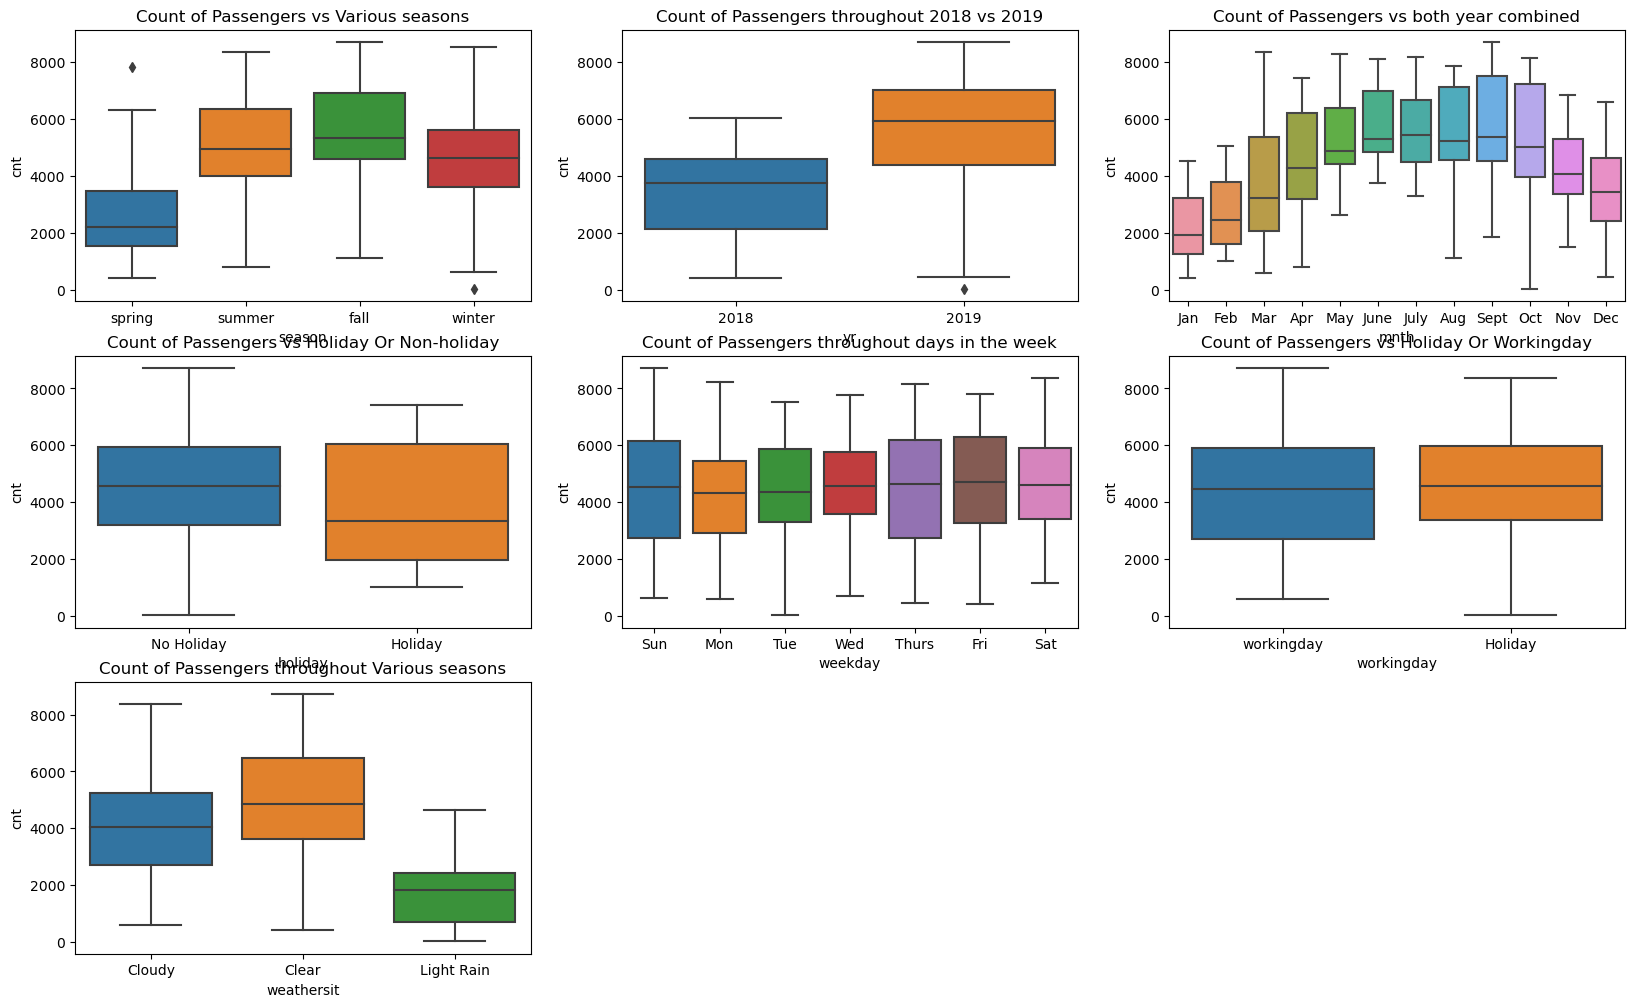

In [14]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data).set_title('Count of Passengers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=data).set_title('Count of Passengers throughout Various seasons')

plt.show()

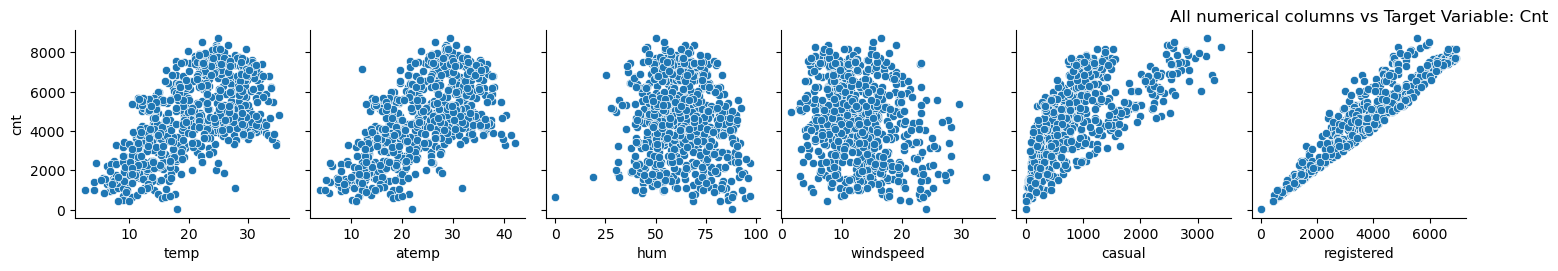

In [15]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(data,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

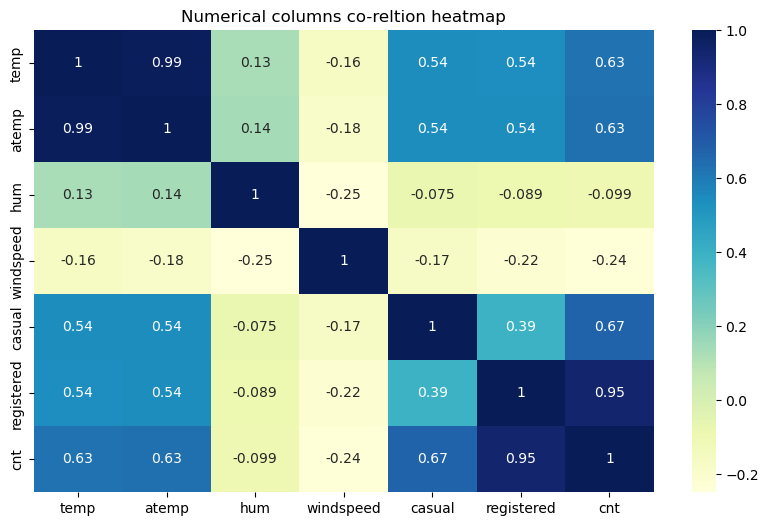

In [16]:
# Heatmap of all variables against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

### Data Prepration

Create dummy variables for all the categorical variables like 0 and 1
    We need to convert them into dummy variables, because machines does not understand their indivisual meanings.

Splitting into test and trainning set
    Split the whole dataset into 70:30 trainning and testing set.

Re-scaling the variables
    We need to scale the numerical columns also because they range from 12 to 1349 which would increase our processing time and also not give us clear co-efficients which can be easily calculated or infered. This means that one co-efficient can be a huge number giving us an impression that is very important which might not be the case.

In [17]:
# 1. Convert the categorical data into dummy variables with drop_first so that the machine uses k-1 columns
# Create a new dataframe to store them
status=pd.get_dummies(data[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
# We then join orignal data and the dummy variable dataframe 'status'.
final=pd.concat([data,status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Sun,workingday,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,spring,2018,Jan,No Holiday,Mon,workingday,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,2018,Jan,No Holiday,Tue,Holiday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,No Holiday,Wed,Holiday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,No Holiday,Thurs,Holiday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
# We then drop the indivisual columns whose dummy variables have been created.
final=final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(final,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [22]:
# Import libraries to scale all the variables
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Create an object to be scaled
scaler=MinMaxScaler()

In [24]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [25]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


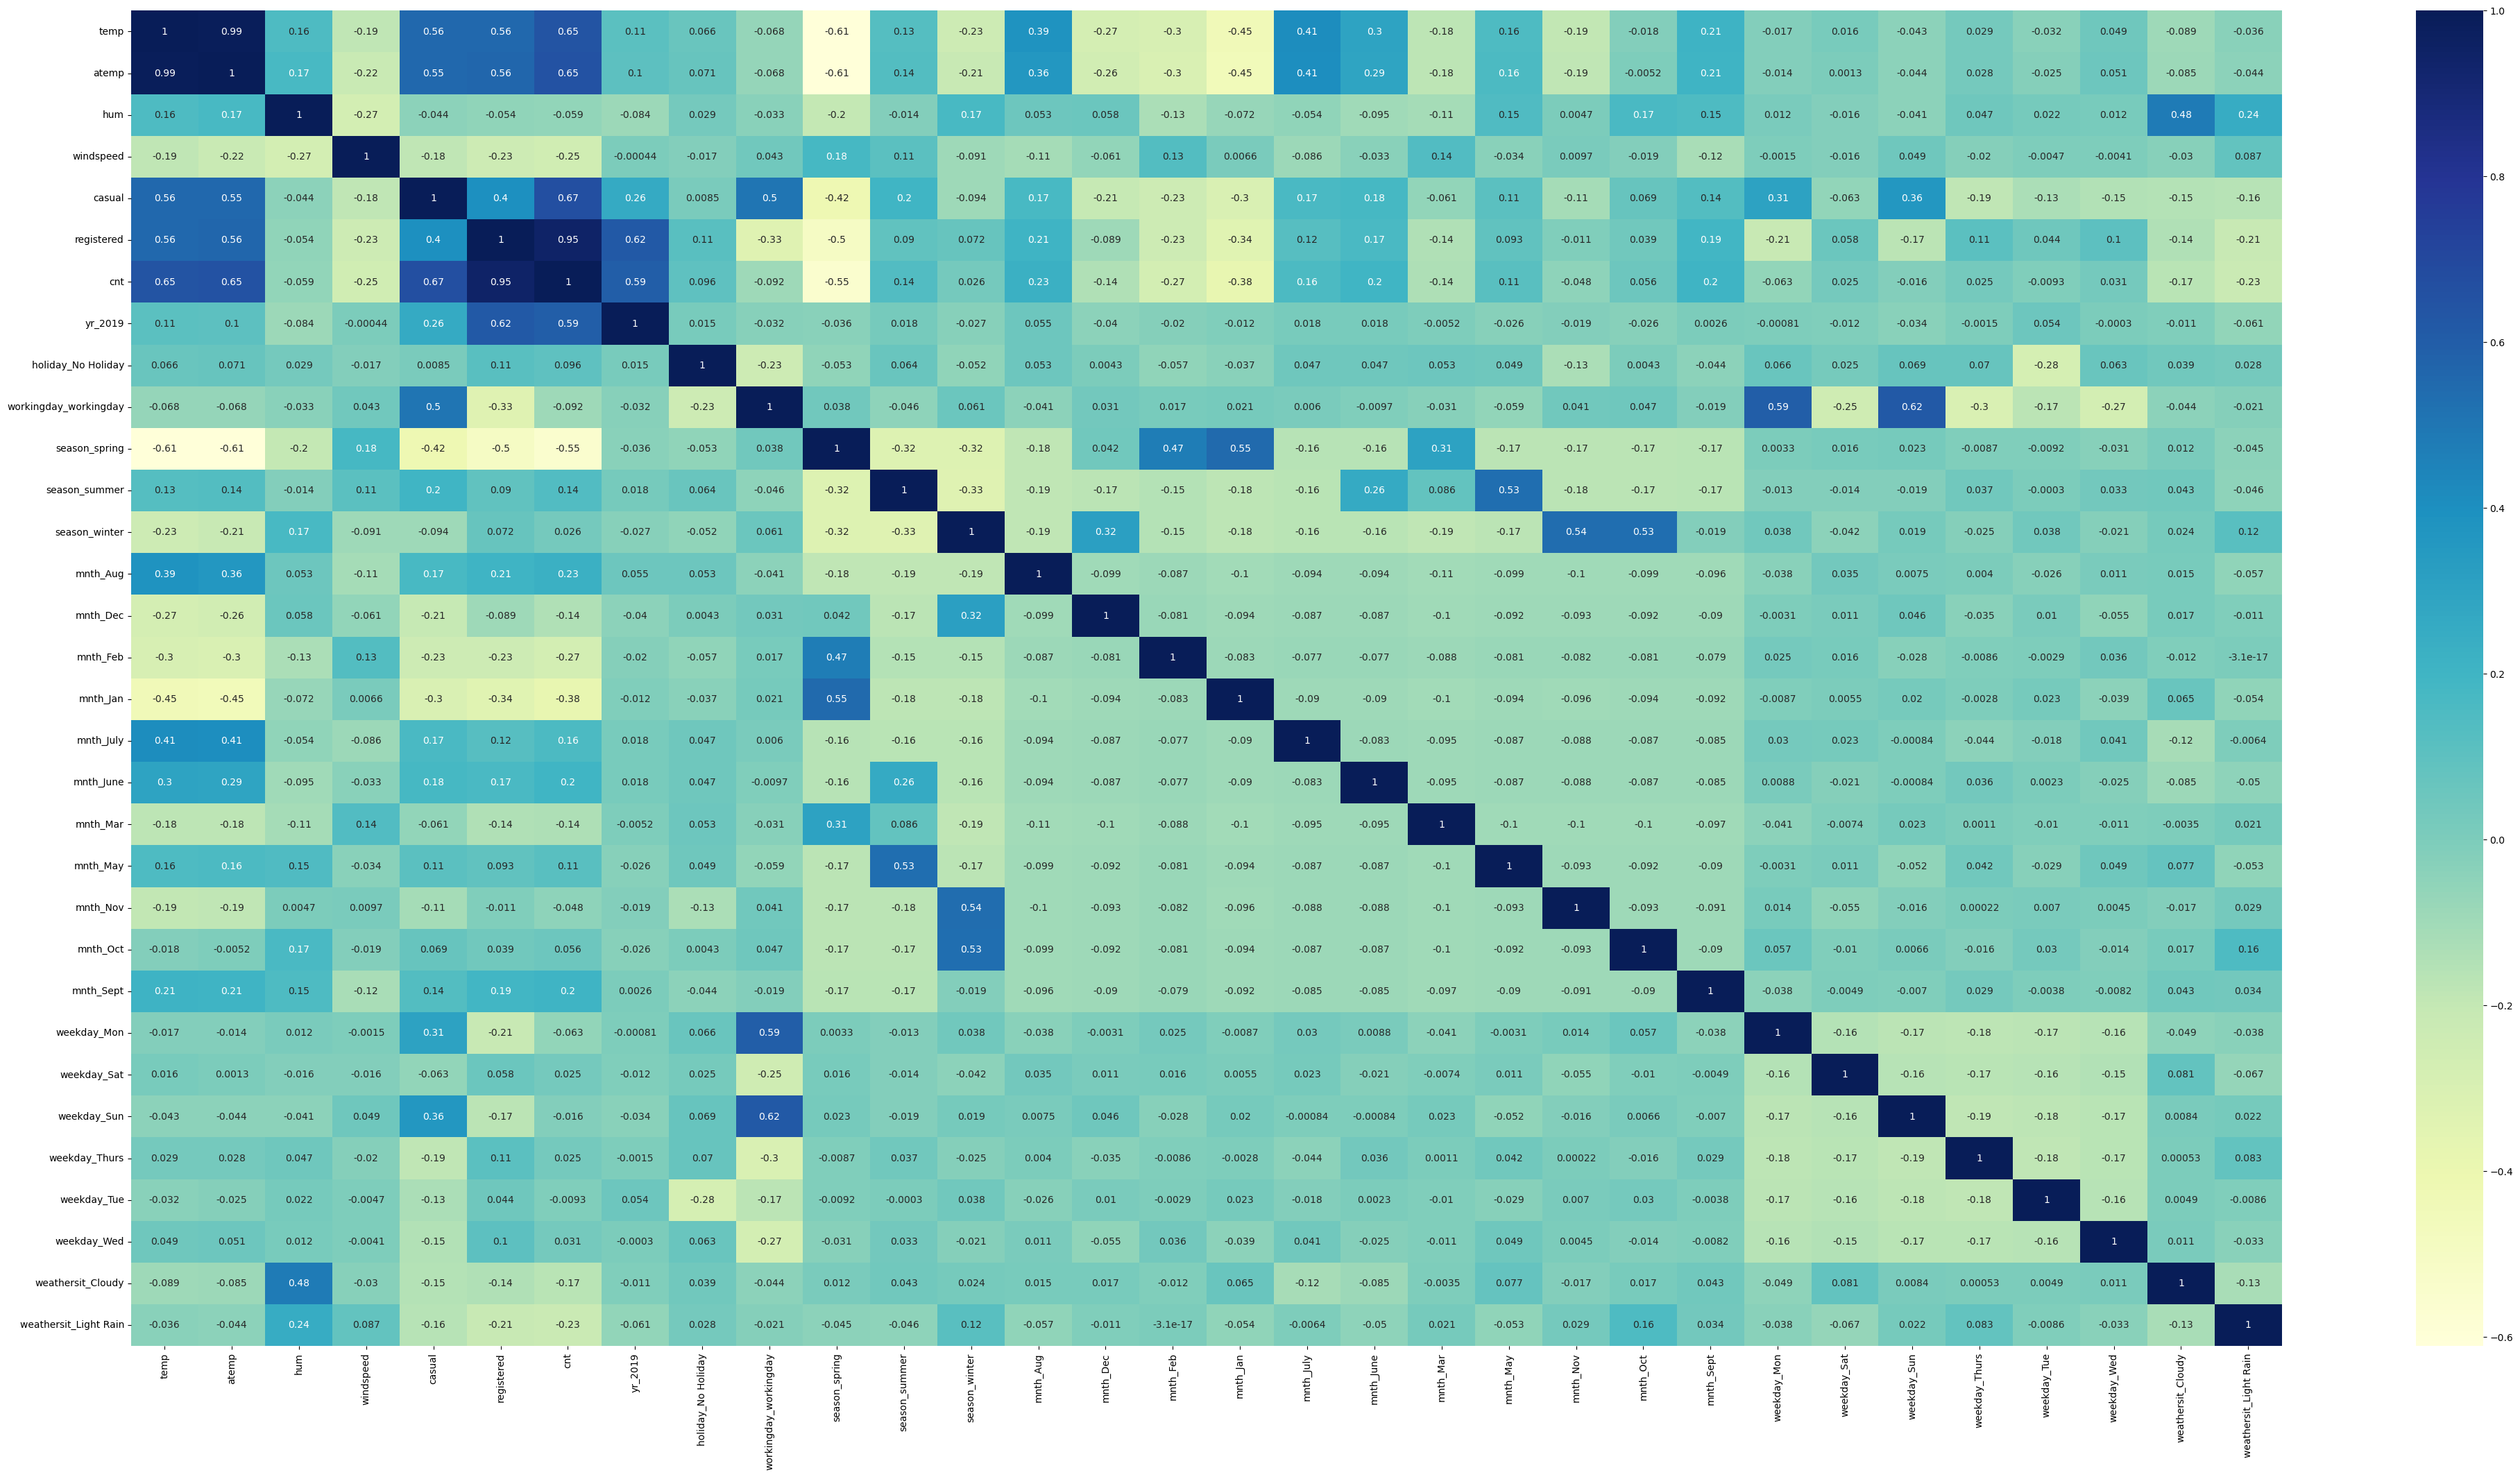

In [26]:
# Plot the co-relation graph to check the co-relation between dumy variables
plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [27]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

# 3.Training the Data

Backward Selection: We would use all variables to make our first model and then using our business accumen we would drop feature by feature.
Backward Selection:We would use all our variables and drop them one by one to prevent high VIF or reduce it in important business variables.

In [28]:
# Creating a model with all the variables
import statsmodels.api as sm
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_xm).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.179e+30
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:32:15   Log-Likelihood:                 16989.
No. Observations:                 510   AIC:                        -3.392e+04
Df Residuals:                     479   BIC:                        -3.379e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.388e-17   4.08e-16      0.034      0.973   -7.88e-16    8.16e-16
temp                  -3.331e-16   1.38e-15     -0.241      0.810   -3.05e-15    2.38e-15
atemp                  8.882e-16   1.33e-15      0.667      0.505   -1.73e-15     3.5e-15
hum                    1.943e-16   3.77e-16      0.516      0.606   -5.46e-16    9.35e-16
windspeed              4.372e-16   2.67e-16      1.639      0.102   -8.68e-17    9.61e-16
casual                    0.3775   3.88e-16   9.73e+14      0.000       0.377       0.377
registered                0.7968   4.61e-16   1.73e+15      0.000       0.797       0.797
yr_2019               -2.949e-17   1.36e-16     -0.217      0.829   -2.97e-16    2.38e-16
holiday_No Holiday    -2.359e-16   1.82e-16     -1.295      0.196   -5.94e-16    1.22e-16
workingday_workingday -3.192e-16   1.56e-16     -2.048      0.041   -6.25e-16    -1.3e-17
season_spring          1.388e-16   2.89e-16      0.480      0.632    -4.3e-16    7.07e-16
season_summer          -1.11e-16   2.53e-16     -0.438      0.661   -6.09e-16    3.87e-16
season_winter          2.637e-16   2.76e-16      0.956      0.339   -2.78e-16    8.05e-16
mnth_Aug                       0   3.26e-16          0      1.000   -6.41e-16    6.41e-16
mnth_Dec               1.839e-16   3.24e-16      0.567      0.571   -4.53e-16    8.21e-16
mnth_Feb               9.021e-17   3.17e-16      0.284      0.776   -5.33e-16    7.14e-16
mnth_Jan               1.527e-16   3.24e-16      0.471      0.638   -4.84e-16     7.9e-16
mnth_July              9.714e-17   3.37e-16      0.288      0.774   -5.66e-16     7.6e-16
mnth_June              9.714e-17   2.41e-16      0.403      0.687   -3.77e-16    5.71e-16
mnth_Mar               1.735e-16   2.36e-16      0.734      0.463   -2.91e-16    6.38e-16
mnth_May               3.331e-16   2.04e-16      1.629      0.104   -6.86e-17    7.35e-16
mnth_Nov              -2.082e-17    3.5e-16     -0.059      0.953   -7.09e-16    6.68e-16
mnth_Oct              -1.284e-16   3.46e-16     -0.371      0.711   -8.08e-16    5.52e-16
mnth_Sept             -2.012e-16    3.1e-16     -0.649      0.517   -8.11e-16    4.08e-16
weekday_Mon            3.955e-16    1.9e-16      2.082      0.038    2.23e-17    7.69e-16
weekday_Sat            6.418e-17   1.51e-16      0.425      0.671   -2.33e-16    3.61e-16
weekday_Sun             3.99e-16   1.86e-16      2.151      0.032    3.45e-17    7.63e-16
weekday_Thurs         -9.714e-17   1.41e-16     -0.687      0.492   -3.75e-16    1.81e-16
weekday_Tue           -1.735e-16   1.46e-16     -1.190      0.235    -4.6e-16    1.13e-16
weekday_Wed           -5.551e-17   1.48e-16     -0.374      0.708   -3.47e-16    2.36e-16
weathersit_Cloudy      6.939e-18   1.04e-16      0.067      0.947   -1.97e-16    2.11e-16
weathersit_Light Rain  

In [29]:
# Import the Variance Inflation library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Let's check it's ViF
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_No Holiday,145.87
0,temp,68.41
8,workingday_workingday,60.00
1,atemp,56.19
25,weekday_Sun,35.11
23,weekday_Mon,33.11
9,season_spring,10.84
11,season_winter,9.95
10,season_summer,8.40
5,registered,7.74


In [31]:
# Drop Variable temp
X=X.drop('atemp',1)

In [32]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()

In [33]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.662e+30
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:32:16   Log-Likelihood:                 17068.
No. Observations:                 510   AIC:                        -3.408e+04
Df Residuals:                     480   BIC:                        -3.395e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.249e-

<b style='color:red;'>Reasoning: </b>Let's make our first model with all the variables and check it's R2 and p-value score.

In [34]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_No Holiday,145.87
7,workingday_workingday,59.97
24,weekday_Sun,35.08
22,weekday_Mon,33.08
8,season_spring,10.82
10,season_winter,9.94
0,temp,8.54
9,season_summer,8.37
4,registered,7.72
19,mnth_Nov,6.81


In [35]:
# Drop Holiday_No Holiday
X=X.drop('holiday_No Holiday',1)

In [36]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.163e+30
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:32:16   Log-Likelihood:                 16977.
No. Observations:                 510   AIC:                        -3.389e+04
Df Residuals:                     480   BIC:                        -3.377e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.465e-

In [37]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.95
4,registered,41.55
1,hum,38.70
6,workingday_workingday,16.84
9,season_winter,12.93
7,season_spring,11.95
3,casual,11.29
23,weekday_Sun,9.36
21,weekday_Mon,8.54
8,season_summer,7.72


In [38]:
# Drop working day variable
X=X.drop('workingday_workingday',1)

In [39]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.678e+29
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:32:16   Log-Likelihood:                 16735.
No. Observations:                 510   AIC:                        -3.341e+04
Df Residuals:                     481   BIC:                        -3.329e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.193e-15   7.54e-16      1.582      0.114   -2.89e-16    2.68e-15
temp                  -1.943e-16      8e-16     -0.243      0.808   -1.77e-15    1.38e-15
hum                   -6.245e-16   6.18e-16     -1.010      0.313   -1.84e-15    5.91e-16
windspeed             -3.782e-16   4.29e-16     -0.881      0.379   -1.22e-15    4.65e-16
casual                    0.3775    6.2e-16   6.09e+14      0.000       0.377       0.377
registered                0.7968   7.18e-16   1.11e+15      0.000       0.797       0.797
yr_2019                1.943e-16   2.19e-16      0.886      0.376   -2.37e-16    6.25e-16
season_spring           2.22e-16   4.75e-16      0.467      0.640   -7.11e-16    1.16e-15
season_summer          2.914e-16   4.15e-16      0.702      0.483   -5.25e-16    1.11e-15
season_winter          2.359e-16   4.53e-16      0.521      0.602   -6.54e-16    1.13e-15
mnth_Aug               3.886e-16   5.31e-16      0.732      0.465   -6.55e-16    1.43e-15
mnth_Dec               3.018e-16   5.32e-16      0.568      0.571   -7.43e-16    1.35e-15
mnth_Feb               1.388e-17   5.21e-16      0.027      0.979   -1.01e-15    1.04e-15
mnth_Jan              -1.457e-16   5.32e-16     -0.274      0.784   -1.19e-15       9e-16
mnth_July              3.608e-16   5.53e-16      0.653      0.514   -7.25e-16    1.45e-15
mnth_June              2.776e-16   3.93e-16      0.707      0.480   -4.94e-16    1.05e-15
mnth_Mar               2.914e-16   3.88e-16      0.751      0.453   -4.71e-16    1.05e-15
mnth_May               3.192e-16   3.34e-16      0.955      0.340   -3.37e-16    9.76e-16
mnth_Nov               2.359e-16   5.73e-16      0.412      0.681   -8.91e-16    1.36e-15
mnth_Oct               1.735e-16   5.68e-16      0.305      0.760   -9.43e-16    1.29e-15
mnth_Sept              3.678e-16   5.08e-16      0.725      0.469    -6.3e-16    1.37e-15
weekday_Mon           -4.857e-17   3.17e-16     -0.153      0.878   -6.71e-16    5.74e-16
weekday_Sat            9.346e-17   2.47e-16      0.378      0.706   -3.92e-16    5.79e-16
weekday_Sun           -2.914e-16   3.09e-16     -0.943      0.346   -8.99e-16    3.16e-16
weekday_Thurs          1.388e-17   2.32e-16      0.060      0.952   -4.42e-16     4.7e-16
weekday_Tue            9.021e-17   2.37e-16      0.381      0.703   -3.75e-16    5.56e-16
weekday_Wed           -6.939e-17   2.44e-16     -0.285      0.776   -5.48e-16    4.09e-16
weathersit_Cloudy      4.094e-16    1.7e-16      2.410      0.016    7.55e-17    7.43e-16
weathersit_Light Rain  5.725e-16   4.55e-16      1.258      0.209   -3.22e-16    1.47e-15
==============================================================================
Omnibus:                        5.311   Durbin-Watson:                   0.102
Prob(Omnibus):                  0.070   Jarqu

In [40]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.28
1,hum,38.70
4,registered,37.77
8,season_winter,12.91
6,season_spring,11.93
3,casual,10.71
7,season_summer,7.69
18,mnth_Oct,6.34
9,mnth_Aug,6.13
17,mnth_Nov,5.99


In [41]:
# Having registration and casual in one go does not make sense as they are inter-related
X=X.drop('registered',1)

In [42]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.93e-228
Time:                        14:32:17   Log-Likelihood:                 641.81
No. Observations:                 510   AIC:                            -1228.
Df Residuals:                     482   BIC:                            -1109.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3112      0.035      8.789      0.000       0.242       0.381
temp                      0.1957      0.039      4.963      0.000       0.118       0.273
hum                      -0.0820      0.031     -2.642      0.009      -0.143      -0.021
windspeed                -0.0923      0.021     -4.338      0.000      -0.134      -0.050
casual                    0.5219      0.031     17.042      0.000       0.462       0.582
yr_2019                   0.1901      0.007     27.486      0.000       0.177       0.204
season_spring            -0.0454      0.024     -1.897      0.058      -0.092       0.002
season_summer             0.0011      0.021      0.054      0.957      -0.040       0.042
season_winter             0.1146      0.022      5.144      0.000       0.071       0.158
mnth_Aug                  0.0342      0.027      1.277      0.202      -0.018       0.087
mnth_Dec                 -0.0226      0.027     -0.841      0.401      -0.075       0.030
mnth_Feb                 -0.0115      0.026     -0.436      0.663      -0.063       0.040
mnth_Jan                 -0.0400      0.027     -1.491      0.137      -0.093       0.013
mnth_July                 0.0009      0.028      0.031      0.975      -0.054       0.056
mnth_June                 0.0348      0.020      1.758      0.079      -0.004       0.074
mnth_Mar                 -0.0015      0.020     -0.077      0.939      -0.040       0.037
mnth_May                  0.0398      0.017      2.370      0.018       0.007       0.073
mnth_Nov                 -0.0566      0.029     -1.961      0.050      -0.113       0.000
mnth_Oct                 -0.0340      0.029     -1.185      0.237      -0.090       0.022
mnth_Sept                 0.0601      0.026      2.356      0.019       0.010       0.110
weekday_Mon              -0.1667      0.014    -11.831      0.000      -0.194      -0.139
weekday_Sat              -0.0138      0.012     -1.107      0.269      -0.038       0.011
weekday_Sun              -0.1313      0.014     -9.098      0.000      -0.160      -0.103
weekday_Thurs             0.0135      0.012      1.150      0.251      -0.010       0.036
weekday_Tue              -0.0308      0.012     -2.587      0.010      -0.054      -0.007
weekday_Wed               0.0006      0.012      0.045      0.964      -0.024       0.025
weathersit_Cloudy        -0.0386      0.008     -4.595      0.000      -0.055      -0.022
weathersit_Light Rain    -0.1814      0.021     -8.452      0.000      -0.224      -0.139
==============================================================================
Omnibus:                      201.990   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1165.812
Skew:                          -1.633   Prob(JB):       

In [43]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,43.90
1,hum,38.69
5,season_spring,11.86
7,season_winter,11.69
3,casual,10.24
6,season_summer,7.12
17,mnth_Oct,6.30
16,mnth_Nov,5.94
8,mnth_Aug,5.83
2,windspeed,5.47


In [44]:
# Temprature and Humidity are inversely co-related thus we would have to drop one of them. We would go with humidity
X=X.drop('hum',1)

In [45]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_cm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.15e-227
Time:                        14:32:17   Log-Likelihood:                 638.14
No. Observations:                 510   AIC:                            -1222.
Df Residuals:                     483   BIC:                            -1108.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2796      0.034      8.338      0.000       0.214       0.346
temp                      0.1646      0.038      4.346      0.000       0.090       0.239
windspeed                -0.0759      0.020     -3.707      0.000      -0.116      -0.036
casual                    0.5323      0.031     17.415      0.000       0.472       0.592
yr_2019                   0.1913      0.007     27.540      0.000       0.178       0.205
season_spring            -0.0477      0.024     -1.982      0.048      -0.095      -0.000
season_summer            -0.0044      0.021     -0.207      0.836      -0.046       0.037
season_winter             0.1125      0.022      5.022      0.000       0.068       0.157
mnth_Aug                  0.0327      0.027      1.215      0.225      -0.020       0.086
mnth_Dec                 -0.0337      0.027     -1.263      0.207      -0.086       0.019
mnth_Feb                 -0.0179      0.026     -0.677      0.498      -0.070       0.034
mnth_Jan                 -0.0495      0.027     -1.848      0.065      -0.102       0.003
mnth_July                 0.0035      0.028      0.124      0.901      -0.052       0.059
mnth_June                 0.0393      0.020      1.982      0.048       0.000       0.078
mnth_Mar                 -0.0057      0.020     -0.291      0.771      -0.044       0.033
mnth_May                  0.0364      0.017      2.161      0.031       0.003       0.070
mnth_Nov                 -0.0654      0.029     -2.268      0.024      -0.122      -0.009
mnth_Oct                 -0.0437      0.029     -1.527      0.127      -0.100       0.013
mnth_Sept                 0.0534      0.026      2.092      0.037       0.003       0.104
weekday_Mon              -0.1715      0.014    -12.208      0.000      -0.199      -0.144
weekday_Sat              -0.0139      0.013     -1.110      0.267      -0.039       0.011
weekday_Sun              -0.1342      0.014     -9.261      0.000      -0.163      -0.106
weekday_Thurs             0.0126      0.012      1.068      0.286      -0.011       0.036
weekday_Tue              -0.0327      0.012     -2.735      0.006      -0.056      -0.009
weekday_Wed              -0.0005      0.012     -0.037      0.971      -0.025       0.024
weathersit_Cloudy        -0.0507      0.007     -7.159      0.000      -0.065      -0.037
weathersit_Light Rain    -0.2020      0.020    -10.031      0.000      -0.242      -0.162
==============================================================================
Omnibus:                      202.546   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.032
Skew:                          -1.633   Prob(JB):                    4.72e-258
Kurtosis:                       9.715   Cond. No.                  

In [46]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,31.91
6,season_winter,11.49
4,season_spring,11.38
2,casual,10.09
5,season_summer,5.99
16,mnth_Oct,5.84
7,mnth_Aug,5.63
15,mnth_Nov,5.37
1,windspeed,5.24
11,mnth_July,5.20


In [47]:
# Spring and winter have a co-relation of -0.32 thus we can drop one of them too. Because we have summer, we need to have winter. Thus we can drop spring
X=X.drop('season_spring',1)

In [48]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_cm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.91e-228
Time:                        14:32:17   Log-Likelihood:                 636.08
No. Observations:                 510   AIC:                            -1220.
Df Residuals:                     484   BIC:                            -1110.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2501      0.030      8.298      0.000       0.191       0.309
temp                      0.1729      0.038      4.582      0.000       0.099       0.247
windspeed                -0.0787      0.020     -3.840      0.000      -0.119      -0.038
casual                    0.5328      0.031     17.382      0.000       0.473       0.593
yr_2019                   0.1910      0.007     27.417      0.000       0.177       0.205
season_summer             0.0227      0.016      1.414      0.158      -0.009       0.054
season_winter             0.1392      0.018      7.758      0.000       0.104       0.174
mnth_Aug                  0.0568      0.024      2.351      0.019       0.009       0.104
mnth_Dec                 -0.0387      0.027     -1.452      0.147      -0.091       0.014
mnth_Feb                 -0.0367      0.025     -1.489      0.137      -0.085       0.012
mnth_Jan                 -0.0679      0.025     -2.695      0.007      -0.117      -0.018
mnth_July                 0.0270      0.026      1.060      0.290      -0.023       0.077
mnth_June                 0.0464      0.020      2.371      0.018       0.008       0.085
mnth_Mar                 -0.0184      0.019     -0.984      0.326      -0.055       0.018
mnth_May                  0.0347      0.017      2.057      0.040       0.002       0.068
mnth_Nov                 -0.0646      0.029     -2.232      0.026      -0.121      -0.008
mnth_Oct                 -0.0441      0.029     -1.538      0.125      -0.101       0.012
mnth_Sept                 0.0723      0.024      3.042      0.002       0.026       0.119
weekday_Mon              -0.1725      0.014    -12.247      0.000      -0.200      -0.145
weekday_Sat              -0.0143      0.013     -1.137      0.256      -0.039       0.010
weekday_Sun              -0.1355      0.015     -9.334      0.000      -0.164      -0.107
weekday_Thurs             0.0118      0.012      0.997      0.319      -0.011       0.035
weekday_Tue              -0.0327      0.012     -2.731      0.007      -0.056      -0.009
weekday_Wed              -0.0009      0.012     -0.075      0.940      -0.025       0.023
weathersit_Cloudy        -0.0506      0.007     -7.112      0.000      -0.065      -0.037
weathersit_Light Rain    -0.1997      0.020     -9.905      0.000      -0.239      -0.160
==============================================================================
Omnibus:                      198.042   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.704
Skew:                          -1.599   Prob(JB):                    1.09e-246
Kurtosis:                       9.564   Cond. No.                         32.0
==============================================================================

In [49]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,30.51
2,casual,10.09
5,season_winter,7.96
15,mnth_Oct,5.54
6,mnth_Aug,5.07
1,windspeed,5.02
14,mnth_Nov,4.98
10,mnth_July,4.71
4,season_summer,4.32
16,mnth_Sept,3.74


In [50]:
# Temprature and Casual have a high co-relation of 0.56 thus we would need to remove casual
X=X.drop('casual',1)

In [51]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_cm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     109.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.43e-178
Time:                        14:32:18   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     485   BIC:                            -868.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2437      0.038      6.351      0.000       0.168       0.319
temp                      0.3954      0.045      8.748      0.000       0.307       0.484
windspeed                -0.1626      0.025     -6.409      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.851      0.000       0.221       0.253
season_summer             0.0617      0.020      3.052      0.002       0.022       0.101
season_winter             0.1373      0.023      6.011      0.000       0.092       0.182
mnth_Aug                  0.0461      0.031      1.499      0.135      -0.014       0.106
mnth_Dec                 -0.0774      0.034     -2.291      0.022      -0.144      -0.011
mnth_Feb                 -0.0704      0.031     -2.248      0.025      -0.132      -0.009
mnth_Jan                 -0.1057      0.032     -3.310      0.001      -0.169      -0.043
mnth_July                -0.0010      0.032     -0.032      0.975      -0.065       0.063
mnth_June                 0.0240      0.025      0.963      0.336      -0.025       0.073
mnth_Mar                 -0.0186      0.024     -0.784      0.433      -0.065       0.028
mnth_May                  0.0190      0.021      0.884      0.377      -0.023       0.061
mnth_Nov                 -0.0687      0.037     -1.866      0.063      -0.141       0.004
mnth_Oct                 -0.0163      0.036     -0.447      0.655      -0.088       0.055
mnth_Sept                 0.0914      0.030      3.022      0.003       0.032       0.151
weekday_Mon              -0.0488      0.015     -3.155      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.194      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.579      0.115      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.591      0.555      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.306      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.765      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.485   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.165
Skew:                          -0.886   Prob(JB):                     5.35e-62
Kurtosis:                       6.184   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [52]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.18
4,season_winter,7.96
14,mnth_Oct,5.53
5,mnth_Aug,5.07
13,mnth_Nov,4.98
1,windspeed,4.71
9,mnth_July,4.68
3,season_summer,4.20
15,mnth_Sept,3.73
6,mnth_Dec,3.27


In [53]:
# Month july has p-value of 0.967
X=X.drop('mnth_July',1)

In [54]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_cm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.25e-179
Time:                        14:32:18   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -976.8
Df Residuals:                     486   BIC:                            -875.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2434      0.037      6.539      0.000       0.170       0.317
temp                      0.3947      0.040      9.781      0.000       0.315       0.474
windspeed                -0.1625      0.025     -6.448      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     28.981      0.000       0.221       0.253
season_summer             0.0621      0.016      3.771      0.000       0.030       0.094
season_winter             0.1373      0.023      6.017      0.000       0.092       0.182
mnth_Aug                  0.0468      0.018      2.571      0.010       0.011       0.083
mnth_Dec                 -0.0770      0.030     -2.551      0.011      -0.136      -0.018
mnth_Feb                 -0.0699      0.028     -2.498      0.013      -0.125      -0.015
mnth_Jan                 -0.1053      0.029     -3.596      0.000      -0.163      -0.048
mnth_June                 0.0245      0.019      1.315      0.189      -0.012       0.061
mnth_Mar                 -0.0182      0.020     -0.899      0.369      -0.058       0.022
mnth_May                  0.0193      0.019      1.014      0.311      -0.018       0.057
mnth_Nov                 -0.0682      0.033     -2.065      0.039      -0.133      -0.003
mnth_Oct                 -0.0157      0.031     -0.504      0.614      -0.077       0.045
mnth_Sept                 0.0921      0.020      4.588      0.000       0.053       0.132
weekday_Mon              -0.0489      0.015     -3.161      0.002      -0.079      -0.018
weekday_Sat               0.0099      0.016      0.624      0.533      -0.021       0.041
weekday_Sun               0.0092      0.015      0.608      0.544      -0.021       0.039
weekday_Thurs             0.0029      0.015      0.195      0.846      -0.027       0.032
weekday_Tue              -0.0241      0.015     -1.581      0.114      -0.054       0.006
weekday_Wed              -0.0093      0.016     -0.592      0.554      -0.040       0.022
weathersit_Cloudy        -0.0815      0.009     -9.320      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2915      0.025    -11.786      0.000      -0.340      -0.243
==============================================================================
Omnibus:                       95.600   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.745
Skew:                          -0.887   Prob(JB):                     4.01e-62
Kurtosis:                       6.187   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.70
4,season_winter,7.96
1,windspeed,4.70
13,mnth_Oct,4.27
12,mnth_Nov,4.26
3,season_summer,2.91
6,mnth_Dec,2.75
2,yr_2019,2.10
18,weekday_Thurs,2.10
17,weekday_Sun,2.05


In [56]:
# Month October has a high p-value of 0.544
X=X.drop('mnth_Oct',1)

In [57]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_cm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.30e-180
Time:                        14:32:18   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     487   BIC:                            -881.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2360      0.034      6.902      0.000       0.169       0.303
temp                      0.4009      0.038     10.440      0.000       0.325       0.476
windspeed                -0.1629      0.025     -6.474      0.000      -0.212      -0.113
yr_2019                   0.2369      0.008     29.018      0.000       0.221       0.253
season_summer             0.0651      0.015      4.237      0.000       0.035       0.095
season_winter             0.1290      0.016      8.203      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.798      0.005       0.015       0.084
mnth_Dec                 -0.0658      0.020     -3.212      0.001      -0.106      -0.026
mnth_Feb                 -0.0643      0.026     -2.509      0.012      -0.115      -0.014
mnth_Jan                 -0.0992      0.027     -3.723      0.000      -0.152      -0.047
mnth_June                 0.0251      0.019      1.355      0.176      -0.011       0.062
mnth_Mar                 -0.0144      0.019     -0.766      0.444      -0.051       0.023
mnth_May                  0.0197      0.019      1.036      0.301      -0.018       0.057
mnth_Nov                 -0.0549      0.020     -2.775      0.006      -0.094      -0.016
mnth_Sept                 0.0970      0.017      5.547      0.000       0.063       0.131
weekday_Mon              -0.0488      0.015     -3.157      0.002      -0.079      -0.018
weekday_Sat               0.0101      0.016      0.637      0.524      -0.021       0.041
weekday_Sun               0.0094      0.015      0.624      0.533      -0.020       0.039
weekday_Thurs             0.0030      0.015      0.201      0.841      -0.026       0.032
weekday_Tue              -0.0239      0.015     -1.574      0.116      -0.054       0.006
weekday_Wed              -0.0091      0.016     -0.575      0.566      -0.040       0.022
weathersit_Cloudy        -0.0817      0.009     -9.356      0.000      -0.099      -0.065
weathersit_Light Rain    -0.2924      0.025    -11.860      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       96.581   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.145
Skew:                          -0.895   Prob(JB):                     7.32e-63
Kurtosis:                       6.203   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.65
1,windspeed,4.56
4,season_winter,2.90
3,season_summer,2.80
2,yr_2019,2.10
17,weekday_Thurs,2.08
16,weekday_Sun,2.04
18,weekday_Tue,2.03
14,weekday_Mon,1.95
19,weekday_Wed,1.92


In [59]:
# Both monday and sunday have high p-values but I feel sunday is more redundant as a variable than Monday
X=X.drop('weekday_Sun',1)

In [60]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_cm).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.46e-181
Time:                        14:32:18   Log-Likelihood:                 512.05
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     488   BIC:                            -886.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2415      0.033      7.316      0.000       0.177       0.306
temp                      0.4002      0.038     10.432      0.000       0.325       0.476
windspeed                -0.1624      0.025     -6.461      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.030      0.000       0.221       0.253
season_summer             0.0651      0.015      4.239      0.000       0.035       0.095
season_winter             0.1293      0.016      8.229      0.000       0.098       0.160
mnth_Aug                  0.0492      0.018      2.800      0.005       0.015       0.084
mnth_Dec                 -0.0663      0.020     -3.239      0.001      -0.106      -0.026
mnth_Feb                 -0.0646      0.026     -2.526      0.012      -0.115      -0.014
mnth_Jan                 -0.0996      0.027     -3.740      0.000      -0.152      -0.047
mnth_June                 0.0252      0.019      1.358      0.175      -0.011       0.062
mnth_Mar                 -0.0149      0.019     -0.792      0.429      -0.052       0.022
mnth_May                  0.0193      0.019      1.020      0.308      -0.018       0.057
mnth_Nov                 -0.0558      0.020     -2.831      0.005      -0.095      -0.017
mnth_Sept                 0.0967      0.017      5.533      0.000       0.062       0.131
weekday_Mon              -0.0538      0.013     -4.111      0.000      -0.080      -0.028
weekday_Sat               0.0050      0.014      0.369      0.712      -0.022       0.032
weekday_Thurs            -0.0020      0.013     -0.161      0.872      -0.027       0.023
weekday_Tue              -0.0290      0.013     -2.264      0.024      -0.054      -0.004
weekday_Wed              -0.0141      0.013     -1.046      0.296      -0.041       0.012
weathersit_Cloudy        -0.0815      0.009     -9.344      0.000      -0.099      -0.064
weathersit_Light Rain    -0.2926      0.025    -11.879      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       96.045   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.139
Skew:                          -0.884   Prob(JB):                     9.94e-64
Kurtosis:                       6.245   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.48
1,windspeed,4.48
4,season_winter,2.80
3,season_summer,2.75
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
19,weathersit_Cloudy,1.61
9,mnth_June,1.61


In [62]:
X=X.drop('weekday_Sat',1)

In [63]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.26e-182
Time:                        14:32:19   Log-Likelihood:                 511.98
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     489   BIC:                            -893.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2432      0.033      7.448      0.000       0.179       0.307
temp                      0.4002      0.038     10.441      0.000       0.325       0.476
windspeed                -0.1626      0.025     -6.477      0.000      -0.212      -0.113
yr_2019                   0.2368      0.008     29.057      0.000       0.221       0.253
season_summer             0.0649      0.015      4.235      0.000       0.035       0.095
season_winter             0.1292      0.016      8.232      0.000       0.098       0.160
mnth_Aug                  0.0491      0.018      2.796      0.005       0.015       0.084
mnth_Dec                 -0.0665      0.020     -3.254      0.001      -0.107      -0.026
mnth_Feb                 -0.0646      0.026     -2.526      0.012      -0.115      -0.014
mnth_Jan                 -0.0999      0.027     -3.753      0.000      -0.152      -0.048
mnth_June                 0.0250      0.019      1.350      0.177      -0.011       0.061
mnth_Mar                 -0.0151      0.019     -0.806      0.421      -0.052       0.022
mnth_May                  0.0194      0.019      1.025      0.306      -0.018       0.057
mnth_Nov                 -0.0561      0.020     -2.854      0.004      -0.095      -0.017
mnth_Sept                 0.0964      0.017      5.528      0.000       0.062       0.131
weekday_Mon              -0.0554      0.012     -4.471      0.000      -0.080      -0.031
weekday_Thurs            -0.0036      0.012     -0.299      0.765      -0.027       0.020
weekday_Tue              -0.0306      0.012     -2.525      0.012      -0.054      -0.007
weekday_Wed              -0.0157      0.013     -1.227      0.220      -0.041       0.009
weathersit_Cloudy        -0.0813      0.009     -9.351      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2932      0.025    -11.933      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       96.715   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.664
Skew:                          -0.889   Prob(JB):                     2.81e-64
Kurtosis:                       6.257   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.00
1,windspeed,4.47
4,season_winter,2.79
3,season_summer,2.74
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
18,weathersit_Cloudy,1.60


In [65]:
X=X.drop('weekday_Mon',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     132.6
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.25e-179
Time:                        14:32:19   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     490   BIC:                            -878.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2233      0.033      6.771      0.000       0.158       0.288
temp                      0.4044      0.039     10.355      0.000       0.328       0.481
windspeed                -0.1609      0.026     -6.288      0.000      -0.211      -0.111
yr_2019                   0.2363      0.008     28.445      0.000       0.220       0.253
season_summer             0.0663      0.016      4.245      0.000       0.036       0.097
season_winter             0.1278      0.016      7.989      0.000       0.096       0.159
mnth_Aug                  0.0531      0.018      2.972      0.003       0.018       0.088
mnth_Dec                 -0.0607      0.021     -2.921      0.004      -0.102      -0.020
mnth_Feb                 -0.0635      0.026     -2.437      0.015      -0.115      -0.012
mnth_Jan                 -0.0953      0.027     -3.518      0.000      -0.149      -0.042
mnth_June                 0.0251      0.019      1.333      0.183      -0.012       0.062
mnth_Mar                 -0.0101      0.019     -0.532      0.595      -0.048       0.027
mnth_May                  0.0191      0.019      0.989      0.323      -0.019       0.057
mnth_Nov                 -0.0528      0.020     -2.636      0.009      -0.092      -0.013
mnth_Sept                 0.1006      0.018      5.669      0.000       0.066       0.136
weekday_Thurs             0.0104      0.012      0.891      0.374      -0.013       0.033
weekday_Tue              -0.0162      0.012     -1.361      0.174      -0.040       0.007
weekday_Wed              -0.0013      0.013     -0.100      0.920      -0.026       0.024
weathersit_Cloudy        -0.0794      0.009     -8.969      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2885      0.025    -11.534      0.000      -0.338      -0.239
==============================================================================
Omnibus:                       82.574   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.810
Skew:                          -0.798   Prob(JB):                     6.83e-49
Kurtosis:                       5.809   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.71
1,windspeed,4.47
4,season_winter,2.76
3,season_summer,2.73
2,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
17,weathersit_Cloudy,1.60


In [67]:
# We can drop Spring months which are march and may
X=X.drop('mnth_Mar',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.11e-180
Time:                        14:32:19   Log-Likelihood:                 501.62
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     491   BIC:                            -884.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2127      0.026      8.082      0.000       0.161       0.264
temp                      0.4151      0.033     12.402      0.000       0.349       0.481
windspeed                -0.1607      0.026     -6.286      0.000      -0.211      -0.110
yr_2019                   0.2360      0.008     28.477      0.000       0.220       0.252
season_summer             0.0686      0.015      4.567      0.000       0.039       0.098
season_winter             0.1315      0.014      9.130      0.000       0.103       0.160
mnth_Aug                  0.0552      0.017      3.169      0.002       0.021       0.089
mnth_Dec                 -0.0562      0.019     -2.963      0.003      -0.093      -0.019
mnth_Feb                 -0.0560      0.022     -2.564      0.011      -0.099      -0.013
mnth_Jan                 -0.0869      0.022     -3.949      0.000      -0.130      -0.044
mnth_June                 0.0261      0.019      1.391      0.165      -0.011       0.063
mnth_May                  0.0205      0.019      1.075      0.283      -0.017       0.058
mnth_Nov                 -0.0501      0.019     -2.588      0.010      -0.088      -0.012
mnth_Sept                 0.1031      0.017      6.015      0.000       0.069       0.137
weekday_Thurs             0.0103      0.012      0.879      0.380      -0.013       0.033
weekday_Tue              -0.0162      0.012     -1.360      0.174      -0.040       0.007
weekday_Wed              -0.0013      0.013     -0.103      0.918      -0.026       0.023
weathersit_Cloudy        -0.0794      0.009     -8.985      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2883      0.025    -11.534      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       80.763   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.698
Skew:                          -0.791   Prob(JB):                     1.77e-46
Kurtosis:                       5.723   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.69
1,windspeed,4.11
3,season_summer,2.73
4,season_winter,2.67
2,yr_2019,2.09
11,mnth_Nov,1.80
10,mnth_May,1.79
5,mnth_Aug,1.75
16,weathersit_Cloudy,1.58
9,mnth_June,1.54


In [69]:
X=X.drop('mnth_May',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     148.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.47e-181
Time:                        14:32:19   Log-Likelihood:                 501.02
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     492   BIC:                            -889.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2080      0.026      8.014      0.000       0.157       0.259
temp                      0.4253      0.032     13.255      0.000       0.362       0.488
windspeed                -0.1631      0.025     -6.405      0.000      -0.213      -0.113
yr_2019                   0.2354      0.008     28.470      0.000       0.219       0.252
season_summer             0.0768      0.013      5.930      0.000       0.051       0.102
season_winter             0.1316      0.014      9.141      0.000       0.103       0.160
mnth_Aug                  0.0525      0.017      3.045      0.002       0.019       0.086
mnth_Dec                 -0.0542      0.019     -2.871      0.004      -0.091      -0.017
mnth_Feb                 -0.0531      0.022     -2.450      0.015      -0.096      -0.011
mnth_Jan                 -0.0835      0.022     -3.834      0.000      -0.126      -0.041
mnth_June                 0.0186      0.017      1.067      0.286      -0.016       0.053
mnth_Nov                 -0.0486      0.019     -2.519      0.012      -0.087      -0.011
mnth_Sept                 0.1014      0.017      5.939      0.000       0.068       0.135
weekday_Thurs             0.0107      0.012      0.915      0.361      -0.012       0.034
weekday_Tue              -0.0164      0.012     -1.382      0.168      -0.040       0.007
weekday_Wed              -0.0011      0.013     -0.091      0.928      -0.026       0.024
weathersit_Cloudy        -0.0789      0.009     -8.936      0.000      -0.096      -0.062
weathersit_Light Rain    -0.2889      0.025    -11.562      0.000      -0.338      -0.240
==============================================================================
Omnibus:                       79.282   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.801
Skew:                          -0.790   Prob(JB):                     6.78e-44
Kurtosis:                       5.619   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.21
1,windspeed,3.97
4,season_winter,2.66
3,season_summer,2.08
2,yr_2019,2.07
10,mnth_Nov,1.80
5,mnth_Aug,1.71
15,weathersit_Cloudy,1.58
6,mnth_Dec,1.41
11,mnth_Sept,1.39


In [71]:
X=X.drop('mnth_June',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          6.16e-182
Time:                        14:32:19   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     493   BIC:                            -894.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2035      0.026      7.945      0.000       0.153       0.254
temp                      0.4367      0.030     14.424      0.000       0.377       0.496
windspeed                -0.1635      0.025     -6.421      0.000      -0.214      -0.113
yr_2019                   0.2351      0.008     28.447      0.000       0.219       0.251
season_summer             0.0788      0.013      6.150      0.000       0.054       0.104
season_winter             0.1310      0.014      9.103      0.000       0.103       0.159
mnth_Aug                  0.0483      0.017      2.877      0.004       0.015       0.081
mnth_Dec                 -0.0527      0.019     -2.796      0.005      -0.090      -0.016
mnth_Feb                 -0.0513      0.022     -2.376      0.018      -0.094      -0.009
mnth_Jan                 -0.0810      0.022     -3.739      0.000      -0.124      -0.038
mnth_Nov                 -0.0475      0.019     -2.463      0.014      -0.085      -0.010
mnth_Sept                 0.0986      0.017      5.844      0.000       0.065       0.132
weekday_Thurs             0.0110      0.012      0.937      0.349      -0.012       0.034
weekday_Tue              -0.0163      0.012     -1.373      0.170      -0.040       0.007
weekday_Wed              -0.0018      0.013     -0.142      0.887      -0.027       0.023
weathersit_Cloudy        -0.0794      0.009     -9.002      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2898      0.025    -11.598      0.000      -0.339      -0.241
==============================================================================
Omnibus:                       78.588   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.733
Skew:                          -0.788   Prob(JB):                     5.18e-43
Kurtosis:                       5.585   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.39
1,windspeed,3.92
4,season_winter,2.63
2,yr_2019,2.07
3,season_summer,2.06
9,mnth_Nov,1.80
5,mnth_Aug,1.62
14,weathersit_Cloudy,1.57
6,mnth_Dec,1.41
10,mnth_Sept,1.35


In [73]:
X=X.drop('mnth_Feb',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     166.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          7.66e-182
Time:                        14:32:20   Log-Likelihood:                 497.53
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     494   BIC:                            -895.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1694      0.021      7.949      0.000       0.127       0.211
temp                      0.4736      0.026     18.153      0.000       0.422       0.525
windspeed                -0.1625      0.026     -6.350      0.000      -0.213      -0.112
yr_2019                   0.2344      0.008     28.245      0.000       0.218       0.251
season_summer             0.0916      0.012      7.846      0.000       0.069       0.115
season_winter             0.1419      0.014     10.363      0.000       0.115       0.169
mnth_Aug                  0.0532      0.017      3.177      0.002       0.020       0.086
mnth_Dec                 -0.0383      0.018     -2.138      0.033      -0.074      -0.003
mnth_Jan                 -0.0544      0.019     -2.920      0.004      -0.091      -0.018
mnth_Nov                 -0.0386      0.019     -2.031      0.043      -0.076      -0.001
mnth_Sept                 0.1050      0.017      6.274      0.000       0.072       0.138
weekday_Thurs             0.0103      0.012      0.873      0.383      -0.013       0.033
weekday_Tue              -0.0168      0.012     -1.405      0.161      -0.040       0.007
weekday_Wed              -0.0033      0.013     -0.259      0.796      -0.028       0.022
weathersit_Cloudy        -0.0794      0.009     -8.962      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2875      0.025    -11.463      0.000      -0.337      -0.238
==============================================================================
Omnibus:                       70.573   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.325
Skew:                          -0.726   Prob(JB):                     4.63e-37
Kurtosis:                       5.401   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.34
1,windspeed,3.44
4,season_winter,2.58
2,yr_2019,2.05
3,season_summer,1.92
8,mnth_Nov,1.79
5,mnth_Aug,1.60
13,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


In [75]:
X=X.drop('weekday_Thurs',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.23e-183
Time:                        14:32:20   Log-Likelihood:                 497.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     495   BIC:                            -900.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1714      0.021      8.095      0.000       0.130       0.213
temp                      0.4739      0.026     18.171      0.000       0.423       0.525
windspeed                -0.1631      0.026     -6.380      0.000      -0.213      -0.113
yr_2019                   0.2345      0.008     28.264      0.000       0.218       0.251
season_summer             0.0921      0.012      7.895      0.000       0.069       0.115
season_winter             0.1418      0.014     10.357      0.000       0.115       0.169
mnth_Aug                  0.0533      0.017      3.183      0.002       0.020       0.086
mnth_Dec                 -0.0386      0.018     -2.153      0.032      -0.074      -0.003
mnth_Jan                 -0.0542      0.019     -2.909      0.004      -0.091      -0.018
mnth_Nov                 -0.0383      0.019     -2.015      0.044      -0.076      -0.001
mnth_Sept                 0.1053      0.017      6.301      0.000       0.072       0.138
weekday_Tue              -0.0190      0.012     -1.633      0.103      -0.042       0.004
weekday_Wed              -0.0055      0.012     -0.449      0.654      -0.030       0.019
weathersit_Cloudy        -0.0793      0.009     -8.954      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2857      0.025    -11.433      0.000      -0.335      -0.237
==============================================================================
Omnibus:                       72.810   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.625
Skew:                          -0.749   Prob(JB):                     5.40e-38
Kurtosis:                       5.415   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,3.44
4,season_winter,2.58
2,yr_2019,2.05
3,season_summer,1.91
8,mnth_Nov,1.78
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


In [77]:
X=X.drop('mnth_Nov',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.38e-183
Time:                        14:32:20   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     496   BIC:                            -902.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1636      0.021      7.835      0.000       0.123       0.205
temp                      0.4838      0.026     18.826      0.000       0.433       0.534
windspeed                -0.1633      0.026     -6.368      0.000      -0.214      -0.113
yr_2019                   0.2345      0.008     28.176      0.000       0.218       0.251
season_summer             0.0937      0.012      8.034      0.000       0.071       0.117
season_winter             0.1278      0.012     10.807      0.000       0.105       0.151
mnth_Aug                  0.0529      0.017      3.149      0.002       0.020       0.086
mnth_Dec                 -0.0246      0.017     -1.487      0.138      -0.057       0.008
mnth_Jan                 -0.0488      0.018     -2.640      0.009      -0.085      -0.012
mnth_Sept                 0.1089      0.017      6.527      0.000       0.076       0.142
weekday_Tue              -0.0186      0.012     -1.591      0.112      -0.042       0.004
weekday_Wed              -0.0055      0.012     -0.443      0.658      -0.030       0.019
weathersit_Cloudy        -0.0785      0.009     -8.847      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2819      0.025    -11.279      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       71.289   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.058
Skew:                          -0.737   Prob(JB):                     5.29e-37
Kurtosis:                       5.386   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.38
2,yr_2019,2.05
3,season_summer,1.90
4,season_winter,1.70
5,mnth_Aug,1.60
11,weathersit_Cloudy,1.55
8,mnth_Sept,1.32
6,mnth_Dec,1.23
7,mnth_Jan,1.23


In [79]:
X=X.drop('mnth_Dec',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_cm).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.96e-184
Time:                        14:32:20   Log-Likelihood:                 493.92
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     497   BIC:                            -906.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1538      0.020      7.752      0.000       0.115       0.193
temp                      0.4939      0.025     19.906      0.000       0.445       0.543
windspeed                -0.1592      0.026     -6.237      0.000      -0.209      -0.109
yr_2019                   0.2345      0.008     28.145      0.000       0.218       0.251
season_summer             0.0959      0.012      8.277      0.000       0.073       0.119
season_winter             0.1255      0.012     10.692      0.000       0.102       0.149
mnth_Aug                  0.0532      0.017      3.168      0.002       0.020       0.086
mnth_Jan                 -0.0427      0.018     -2.364      0.018      -0.078      -0.007
mnth_Sept                 0.1108      0.017      6.656      0.000       0.078       0.144
weekday_Tue              -0.0184      0.012     -1.574      0.116      -0.041       0.005
weekday_Wed              -0.0046      0.012     -0.368      0.713      -0.029       0.020
weathersit_Cloudy        -0.0785      0.009     -8.838      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2799      0.025    -11.201      0.000      -0.329      -0.231
==============================================================================
Omnibus:                       68.013   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.676
Skew:                          -0.715   Prob(JB):                     2.59e-34
Kurtosis:                       5.288   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,3.34
2,yr_2019,2.05
3,season_summer,1.90
5,mnth_Aug,1.59
4,season_winter,1.55
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.23
8,weekday_Tue,1.21


In [81]:
X=X.drop('weekday_Tue',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_cm).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.00e-184
Time:                        14:32:20   Log-Likelihood:                 492.65
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     498   BIC:                            -910.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1510      0.020      7.630      0.000       0.112       0.190
temp                      0.4942      0.025     19.891      0.000       0.445       0.543
windspeed                -0.1590      0.026     -6.219      0.000      -0.209      -0.109
yr_2019                   0.2338      0.008     28.060      0.000       0.217       0.250
season_summer             0.0956      0.012      8.236      0.000       0.073       0.118
season_winter             0.1249      0.012     10.626      0.000       0.102       0.148
mnth_Aug                  0.0534      0.017      3.176      0.002       0.020       0.087
mnth_Jan                 -0.0432      0.018     -2.391      0.017      -0.079      -0.008
mnth_Sept                 0.1107      0.017      6.643      0.000       0.078       0.143
weekday_Wed              -0.0014      0.012     -0.113      0.910      -0.025       0.023
weathersit_Cloudy        -0.0785      0.009     -8.826      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2793      0.025    -11.164      0.000      -0.328      -0.230
==============================================================================
Omnibus:                       66.396   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.349
Skew:                          -0.692   Prob(JB):                     3.04e-34
Kurtosis:                       5.313   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.13
1,windspeed,3.33
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.59
4,season_winter,1.54
9,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Wed,1.15


In [83]:
# Season winter and Month january are capturing the same pattern, therefore we can drop one of them. I will prefer January month
X=X.drop('mnth_Jan',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_cm).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.13e-184
Time:                        14:32:20   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -957.5
Df Residuals:                     499   BIC:                            -910.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1260      0.017      7.462      0.000       0.093       0.159
temp                      0.5211      0.022     23.399      0.000       0.477       0.565
windspeed                -0.1515      0.025     -5.944      0.000      -0.202      -0.101
yr_2019                   0.2328      0.008     27.848      0.000       0.216       0.249
season_summer             0.1029      0.011      9.149      0.000       0.081       0.125
season_winter             0.1361      0.011     12.587      0.000       0.115       0.157
mnth_Aug                  0.0557      0.017      3.297      0.001       0.022       0.089
mnth_Sept                 0.1134      0.017      6.787      0.000       0.081       0.146
weekday_Wed              -0.0008      0.012     -0.065      0.949      -0.025       0.023
weathersit_Cloudy        -0.0795      0.009     -8.909      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2776      0.025    -11.048      0.000      -0.327      -0.228
==============================================================================
Omnibus:                       64.537   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.868
Skew:                          -0.676   Prob(JB):                     4.72e-33
Kurtosis:                       5.275   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.09
1,windspeed,3.09
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.58
8,weathersit_Cloudy,1.49
4,season_winter,1.48
6,mnth_Sept,1.30
7,weekday_Wed,1.15
9,weathersit_Light Rain,1.08


In [85]:
# Again august and summers are showing the same pattern
X=X.drop('mnth_Aug',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     263.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.71e-183
Time:                        14:32:21   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     500   BIC:                            -906.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1210      0.017      7.125      0.000       0.088       0.154
temp                      0.5527      0.020     27.242      0.000       0.513       0.593
windspeed                -0.1552      0.026     -6.034      0.000      -0.206      -0.105
yr_2019                   0.2332      0.008     27.616      0.000       0.217       0.250
season_summer             0.0894      0.011      8.451      0.000       0.069       0.110
season_winter             0.1281      0.011     12.039      0.000       0.107       0.149
mnth_Sept                 0.0978      0.016      6.044      0.000       0.066       0.130
weekday_Wed              -0.0011      0.012     -0.089      0.929      -0.026       0.023
weathersit_Cloudy        -0.0767      0.009     -8.543      0.000      -0.094      -0.059
weathersit_Light Rain    -0.2786      0.025    -10.980      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       66.050   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.716   Prob(JB):                     1.92e-31
Kurtosis:                       5.146   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.75
1,windspeed,3.04
2,yr_2019,2.00
3,season_summer,1.57
7,weathersit_Cloudy,1.48
4,season_winter,1.37
5,mnth_Sept,1.20
6,weekday_Wed,1.15
8,weathersit_Light Rain,1.08


In [87]:
# Again august and summers are showing the same pattern
X=X.drop('weekday_Wed',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.53e-184
Time:                        14:32:21   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1209      0.017      7.140      0.000       0.088       0.154
temp                      0.5527      0.020     27.295      0.000       0.513       0.592
windspeed                -0.1552      0.026     -6.041      0.000      -0.206      -0.105
yr_2019                   0.2332      0.008     27.645      0.000       0.217       0.250
season_summer             0.0894      0.011      8.460      0.000       0.069       0.110
season_winter             0.1281      0.011     12.051      0.000       0.107       0.149
mnth_Sept                 0.0978      0.016      6.052      0.000       0.066       0.130
weathersit_Cloudy        -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_Light Rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
2,yr_2019,2.00
3,season_summer,1.57
6,weathersit_Cloudy,1.48
4,season_winter,1.37
5,mnth_Sept,1.20
7,weathersit_Light Rain,1.08


In [89]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_19.predict(X_train_cm)

In [90]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

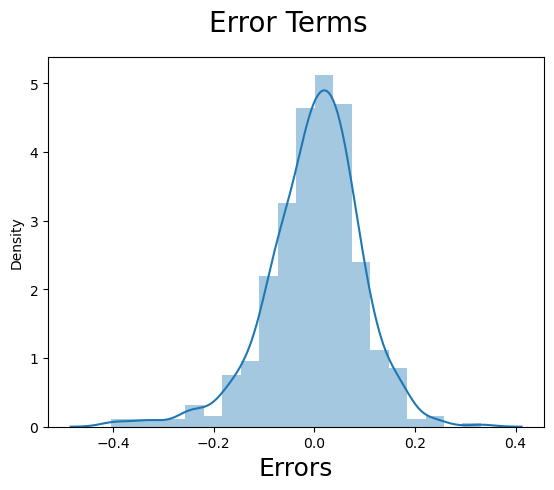

In [91]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

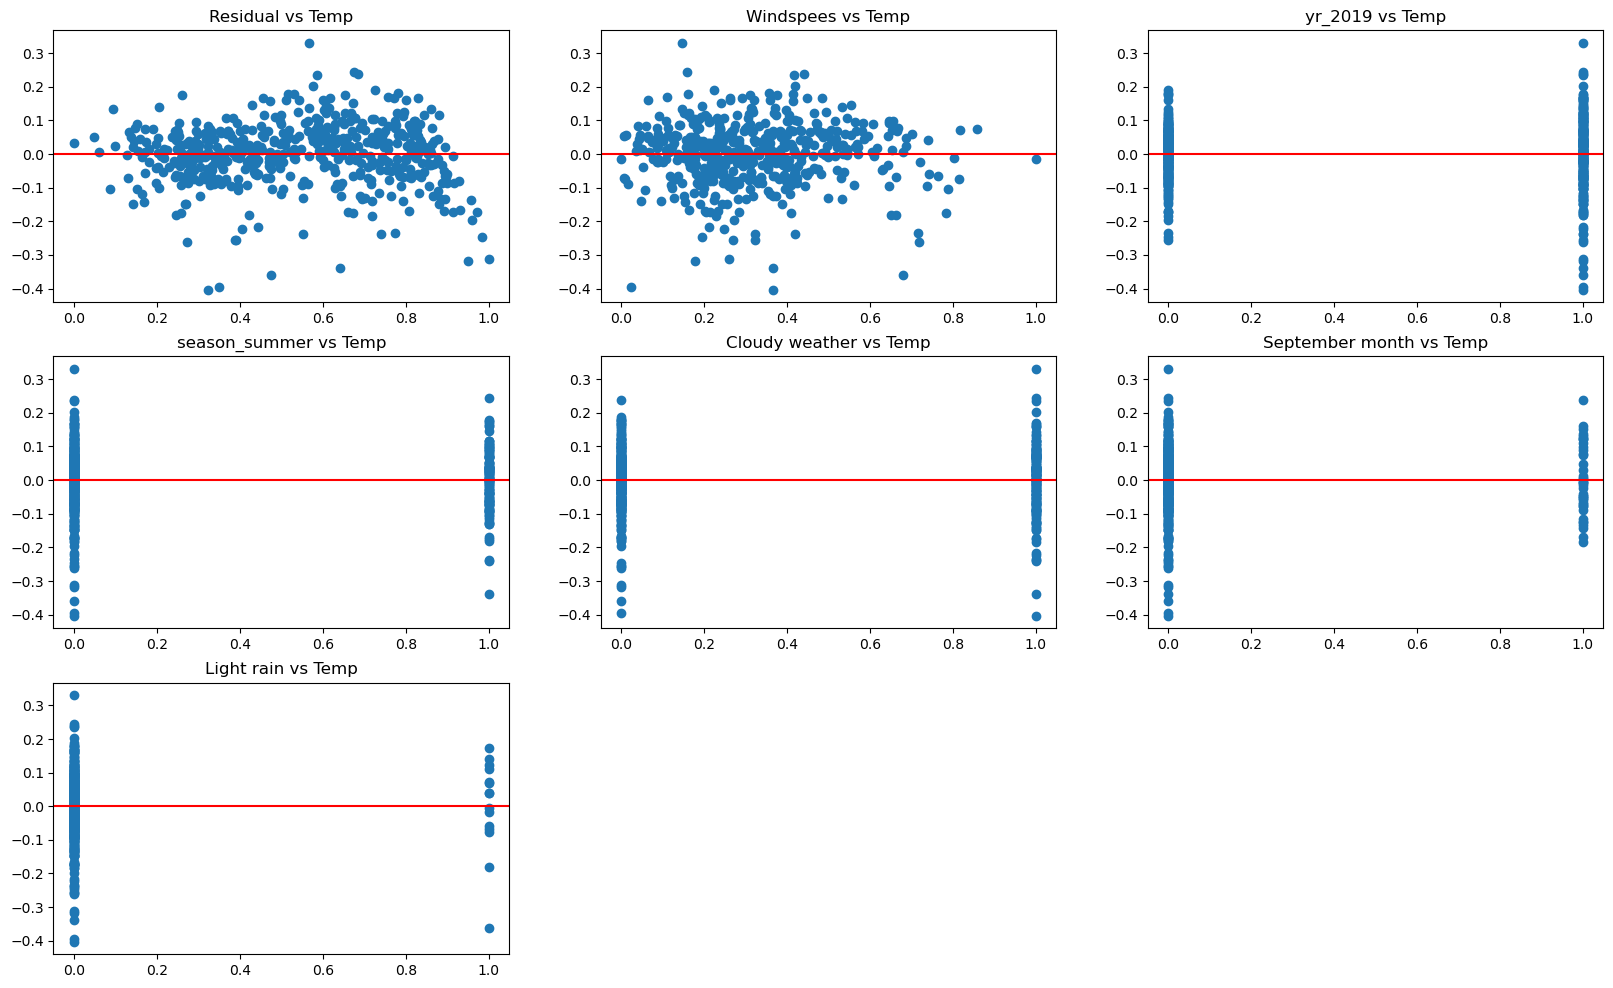

In [92]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [93]:
#  Transform the numerical variables 
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [94]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [96]:
X_test_m5 = X_test_m5.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [97]:
# Making predictions using the fourth model
y_pred_m5 = lr_19.predict(X_test_m5)

In [98]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [99]:
r_squared = r2_score(y_test, y_pred_m5)
r_squared

0.7434807383896257

Text(0, 0.5, 'y_pred')

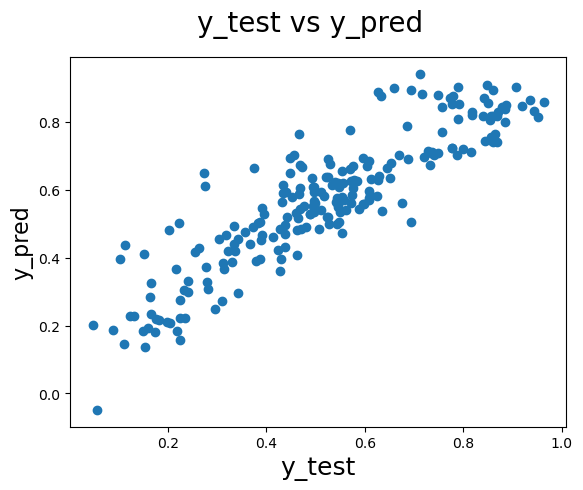

In [100]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Interepretation of results

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)